 # Online Shoppers Purchasing Intention

##  Step 1: Overview of Problem Statement
#### Predicting customer purchase behavior is essential for improving e-commerce conversion rates and user experience. By analyzing browsing data, businesses can identify factors influencing purchases and enhance marketing strategies.

## Step 2 : Objective
#### To develop a machine learning model to predict whether an online shopper will complete a purchase.

## Step 3: Data Description
#### Dataset Source: Online Shoppers Purchasing Intention Dataset
#### Features: 17 input variables representing session and user characteristics
#### Target Variable: Revenue (1 if a purchase occurred, 0 otherwise)

## Step 4: Data Collection

In [14]:
import pandas as pd

# Load the dataset
data_path = r"C:\Users\asus\Downloads\online_shoppers_intention.csv"
data = pd.read_csv(data_path)
print("Dataset loaded successfully!")
print("Dataset Shape:", data.shape)
print("\nFirst few rows of the dataset:\n", data.head())

Dataset loaded successfully!
Dataset Shape: (12330, 18)

First few rows of the dataset:
    Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         

## Step 5: Data Preprocessing

In [15]:
# Check for missing values
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [17]:
# Handle missing values 
data = data.dropna() 
print("After handling missing values, dataset shape:", data.shape)

After handling missing values, dataset shape: (12330, 18)


## Step 6: Exploratory Data Analysis (EDA)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

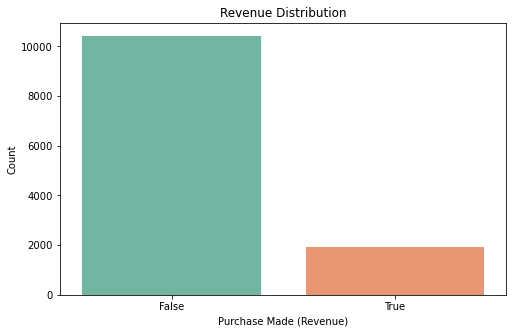

In [19]:
# Plot target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Revenue', data=data, palette='Set2')
plt.title('Revenue Distribution')
plt.xlabel('Purchase Made (Revenue)')
plt.ylabel('Count')
plt.show()

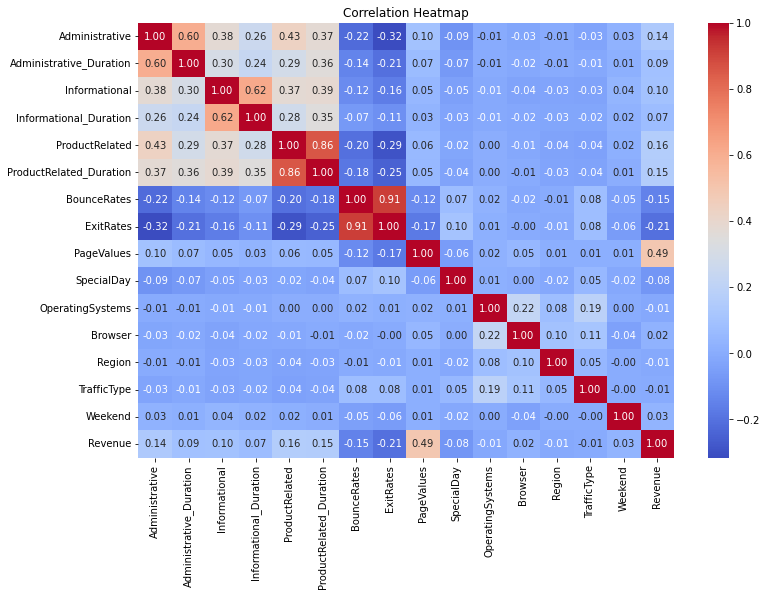

In [20]:
# Correlation heatmap (numerical features)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

## Step 7: Feature Engineering

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Encode categorical variables
categorical_cols = ['Month', 'VisitorType', 'Weekend']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

print("\nCategorical columns encoded successfully!")
print("Sample of encoded columns:\n", data[categorical_cols].head())


Categorical columns encoded successfully!
Sample of encoded columns:
    Month  VisitorType  Weekend
0      2            2        0
1      2            2        0
2      2            2        0
3      2            2        0
4      2            2        1


## Step 8: Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

In [24]:
# Prepare features and target
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [25]:
# Ensure features are numeric for chi2
X = pd.get_dummies(X)

In [26]:
# Select top 10 features
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nTop 10 features selected based on chi-squared test:")
print(selected_features.tolist())


Top 10 features selected based on chi-squared test:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues', 'SpecialDay', 'Month', 'VisitorType']
